In [1]:
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [2]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/balance/report.tsv"

tool_pretty_names = {
    "cooler_cooler": "cooler",
    "hictk_cooler": "hictk (cooler)",
}

resolutions_pretty = {
    10: "10",
    100: "100",
    500: "500",
    1000: "1k",
    5000: "5k",
    10000: "10k",
    25000: "25k",
    50000: "50k",
    100000: "100k",
    250000: "250k",
    500000: "500k",
    1000000: "1M",
    2500000: "2.5M",
    5000000: "5M",
}

color_palette = ["cornflowerblue", "forestgreen"]

matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [3]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_gb"] = df["memory"] / 1.0e6  # kb -> gb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)
    df["resolution_pretty"] = df["resolution"].map(resolutions_pretty)

    return df.sort_values(["resolution", "tool"])

In [4]:
df = import_data(bench_results)
df1 = df.groupby(["tool", "cpus"])["time"].median().reset_index()

cooler_runtime = df1.loc[df1["tool"] == "cooler", "time"].to_numpy()
hictk_cooler_runtime = df1.loc[df1["tool"] == "hictk (cooler)", "time"].to_numpy()

df1 = df.groupby(["tool", "cpus"])["memory"].median().reset_index()

cooler_memory = df1.loc[df1["tool"] == "cooler", "memory"].to_numpy()
hictk_cooler_memory = df1.loc[df1["tool"] == "hictk (cooler)", "memory"].to_numpy()

df

,tool,format,resolution,cpus,time,memory,time_min,memory_gb,resolution_pretty
0,cooler,cooler,500,12,3030.54,1793228,50.509000,1.793228,500
1,cooler,cooler,500,16,2287.63,1792512,38.127167,1.792512,500
2,cooler,cooler,500,20,1844.23,1792620,30.737167,1.792620,500
3,cooler,cooler,500,24,1718.04,1789976,28.634000,1.789976,500
4,cooler,cooler,500,28,1755.97,1791896,29.266167,1.791896,500
5,cooler,cooler,500,32,1712.58,1791876,28.543000,1.791876,500
6,cooler,cooler,500,4,8674.12,1792040,144.568667,1.792040,500
7,cooler,cooler,500,8,4457.49,1790196,74.291500,1.790196,500
16,cooler,cooler,500,12,3013.29,1792384,50.221500,1.792384,500
17,cooler,cooler,500,16,2243.67,1792360,37.394500,1.792360,500


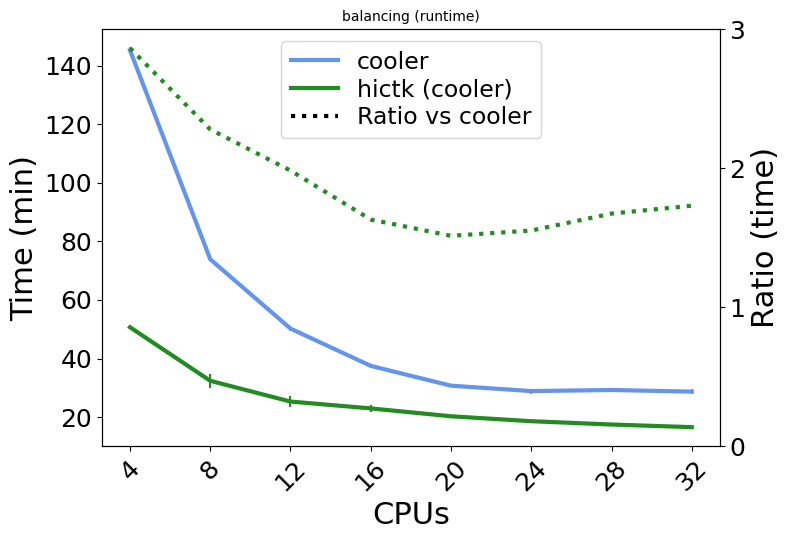

In [5]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5.5))
ax2 = ax1.twinx()


sns.lineplot(
    df,
    x="cpus",
    y="time_min",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax1,
    linewidth=3,
    seed=123456,
    legend=True,
)

palette = sns.color_palette()
ax2.plot(
    list(np.sort(df["cpus"].unique())),
    cooler_runtime / hictk_cooler_runtime,
    linestyle="dotted",
    color=color_palette[1],
    linewidth=3,
)

ax1.set(title="balancing (runtime)", ylabel="Time (min)", xlabel="CPUs")

ax1.tick_params(axis="x", rotation=45)
ax2.set(ylabel="Ratio (time)", ylim=(0, 3))

ax1.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cooler)"),
        Line2D([0], [0], color="black", linestyle="dotted", lw=3, label="Ratio vs cooler"),
    ],
    labelspacing=0.2,
    loc="upper center",
)

loc1 = plticker.MultipleLocator(base=20)
loc2 = plticker.MultipleLocator(base=1)
loc3 = plticker.MultipleLocator(base=4)
ax1.yaxis.set_major_locator(loc1)
ax2.yaxis.set_major_locator(loc2)
ax1.xaxis.set_major_locator(loc3)

fig.tight_layout()
fig.savefig("/tmp/balance_runtime.png", dpi=600)
fig.savefig("/tmp/balance_runtime.svg")

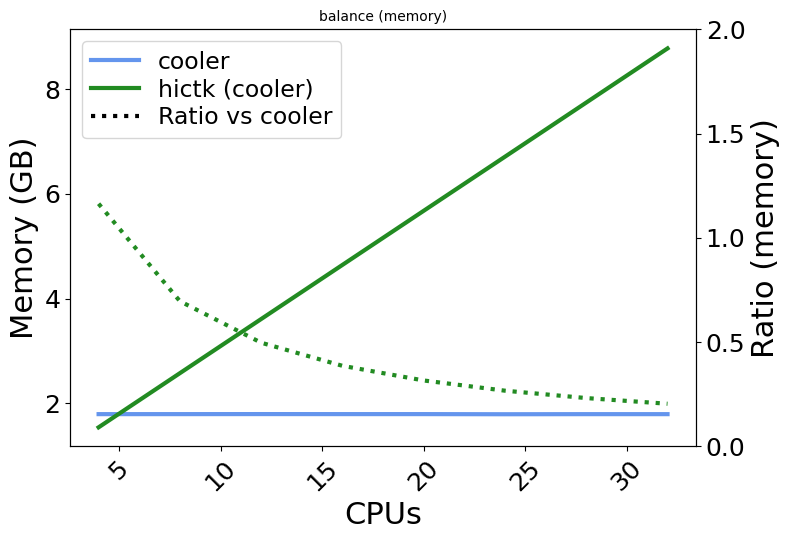

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5.5))
ax2 = ax1.twinx()


sns.lineplot(
    df,
    x="cpus",
    y="memory_gb",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax1,
    linewidth=3,
    seed=123456,
    legend=False,
)

palette = sns.color_palette()
ax2.plot(
    list(np.sort(df["cpus"].unique())),
    cooler_memory / hictk_cooler_memory,
    linestyle="dotted",
    color=color_palette[1],
    linewidth=3,
)

ax1.set(title="balance (memory)", ylabel="Memory (GB)", xlabel="CPUs")

ax1.tick_params(axis="x", rotation=45)
ax2.set(ylabel="Ratio (memory)", ylim=(0, 2))

ax1.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cooler)"),
        Line2D([0], [0], color="black", linestyle="dotted", lw=3, label="Ratio vs cooler"),
    ],
    labelspacing=0.2,
)

loc1 = plticker.MultipleLocator(base=2)
loc2 = plticker.MultipleLocator(base=0.5)
ax1.yaxis.set_major_locator(loc1)
ax2.yaxis.set_major_locator(loc2)

fig.tight_layout()
fig.savefig("/tmp/balance_memory.png", dpi=600)
fig.savefig("/tmp/balance_memory.svg")